In [125]:
#@title
html_code = \
'''
<h1><center>Top Computer Science / Programing Books</center></h1>
'''
display(IPython.display.HTML(html_code))

In [126]:
#@title
html_code = \
'''
<center><img src='https://media4.giphy.com/media/128MHrlrHNwwU0/200.gif'
 width="600" height="300">></center></img>
'''
display(IPython.display.HTML(html_code))


#Introduction

There are enormouse amount of computer science and programming books, let alone resources in general, on the market today. Therefore, let's uncover those that are worth investment.

The dataset we'll explore here holds a list of 271 books in the field of computer science and programming related topics.

The list of books was constructed using many popular websites which provide information on book ratings and of all the books in those websites the 271 most popular were selected.

Inside that dataset, you will find general information about the book including the number of pages in the book, the book types, the book descriptions, and the book prices.

#Purpose

Since there are enormouse amount of computer science and programming books on the market today, based on the information available in the data set, the goal here is identify those that are worth investment.

Source: https://www.kaggle.com/thomaskonstantin/top-270-rated-computer-science-programing-books

### Data Dictionary

*   Rating (float) *The user rating for the book. The rating score ranges between 0 and 5.*
*   Reviews (object) *The number of reviews found on this book.*
*   Book_title (object) The name of the book.
*   Description (object) *A short description of the book.*
*   Number_Of_Pages (int) *Number of pages in the book*
*   Type (object) *The type of the book meaning is it a hardcover book or an ebook or a kindle book etc.*
*   Price (float) *The average price of the book in USD where the average is calculated according the 5 web sources.*









# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import IPython
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Loading the Data Source

In [7]:
source = "https://raw.githubusercontent.com/r0716/RW.PYTH127/main/prog_book.csv"
books_orig = pd.read_csv(source)
books = books_orig.copy()

# The Basics

##**Let's look at some of the basic information about the dataset**

In [8]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rating           271 non-null    float64
 1   Reviews          271 non-null    object 
 2   Book_title       271 non-null    object 
 3   Description      271 non-null    object 
 4   Number_Of_Pages  271 non-null    int64  
 5   Type             271 non-null    object 
 6   Price            271 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 14.9+ KB


In [9]:
books.shape

(271, 7)

***We have 271 rows, 7 columns***



In [10]:
books.columns

Index(['Rating', 'Reviews', 'Book_title', 'Description', 'Number_Of_Pages',
       'Type', 'Price'],
      dtype='object')

***Here we can see the data types for each column***

In [11]:
#books.dtypes

Rating             float64
Reviews             object
Book_title          object
Description         object
Number_Of_Pages      int64
Type                object
Price              float64
dtype: object

# Data Cleaning

***First, we're going to want to change the datatype and remove the commas from 'Reviews' in order to be able to use it in the an a numeric property.***

In [27]:
def remove_comma_from_reviews(value):
  try:
        split = value.split(',')
        votes = int(''.join(split))
        return votes
  except Exception as e:
        return value

num_reviews = books['Reviews']
val = num_reviews[0]
remove_comma_from_reviews(val)
books['Reviews'].dtypes

dtype('int64')

In [28]:
books.describe()

,Rating,Reviews,Number of Pages,Price
count,271.000000,271.000000,271.000000,271.000000
mean,4.067417,185.557196,475.077491,54.541860
std,0.290749,552.122252,306.147492,35.711485
min,3.000000,0.000000,50.000000,9.323529
25%,3.915000,5.500000,289.000000,30.751471
50%,4.100000,35.000000,384.000000,46.317647
75%,4.250000,116.500000,572.500000,67.854412
max,5.000000,5938.000000,3168.000000,235.650000


***Here we can see a quick summary of all the numeric columns in the dataset. ***

*  We can see here the min number of reviews = 0, so we do have some books that have 0 ratings
*  Another take away here is this easily provides the mean, min, and max without the need for computing each seperately.


##**Let's make sure the dataset doesn't have any missing or duplicated values**

In [14]:
books.isnull().sum()

Rating             0
Reviews            0
Book_title         0
Description        0
Number_Of_Pages    0
Type               0
Price              0
dtype: int64

In [15]:
books[books.duplicated() == True]

,Rating,Reviews,Book_title,Description,Number_Of_Pages,Type,Price


***We don't have any missing or duplicated data. Which is great!***

##**Let's rename the columns to be a bit clearer**

In [16]:
books.rename(columns={'Book_title': 'Book Title', 'Number_Of_Pages': 'Number of Pages', 'Type': 'Format'}, inplace=True)
print(list(books.columns))

['Rating', 'Reviews', 'Book Title', 'Description', 'Number of Pages', 'Format', 'Price']


# Analysis

##**Now we want to analyze the dataset**

Text(0.5, 1.0, 'Available Book Formats')

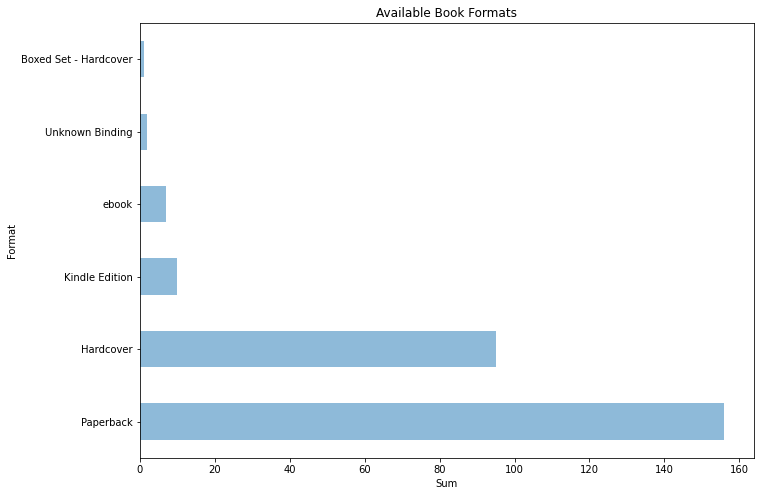

In [17]:
books['Format'].value_counts().plot(kind='barh', alpha=0.5, figsize = (11,8))

plt.xlabel('Sum')
plt.ylabel('Format')
plt.title('Available Book Formats')

***The most common 'Format' is paperback. Not too surprising.***

***Next, have a look at ratings and price.***

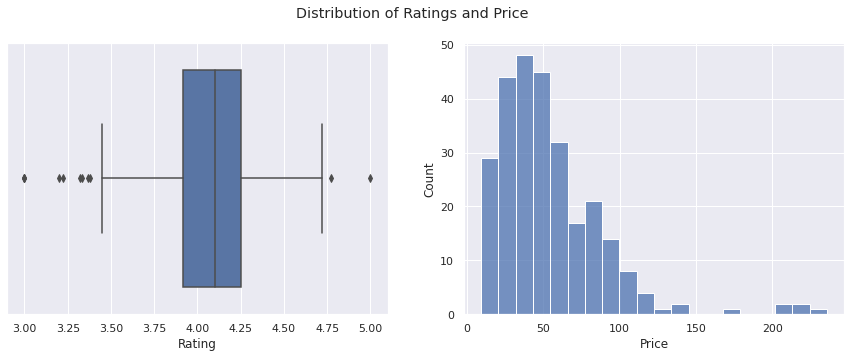

In [88]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 5))
fig.suptitle('Distribution of Ratings and Price')

sns.set_theme()
sns.boxplot(x='Rating', data=books, ax=ax1)
sns.histplot(books['Price'], kde=False, ax=ax2)

plt.show()

*   Most books are rated at 4 in this dataset
*   Most books are bewtween 20 and 50 dollars



In [44]:
books[['Rating', 'Book Title']].sort_values(by=['Rating'], ascending=False).head(10)

,Rating,Book Title
54,5.00,Your First App: Node.js
269,4.77,"The Art of Computer Programming, Volumes 1-4a ..."
131,4.72,Designing Data-Intensive Applications: The Big...
114,4.67,Build Web Applications with Java: Learn every ...
194,4.67,"Fluent Python: Clear, Concise, and Effective P..."
9,4.62,ZX Spectrum Games Code Club: Twenty fun games ...
137,4.62,The Linux Programming Interface: A Linux and U...
198,4.58,CLR via C# (Developer Reference)
103,4.54,The Elements of Computing Systems: Building a ...
146,4.54,Practical Object Oriented Design in Ruby


**Interesting! *Here we can see the higest rated book titles. Are any already on your to read list?***

In [138]:
html_code = \
'''
<center><head>Highest Rated Book</head>
<br><img src='https://d2sofvawe08yqg.cloudfront.net/yfa-nodejs/hero2x?1549425696'
 width="160" height="200"></img>

<p>Summary: In this book, you will learn the basics of designing and developing a node.js application.
<br>Unlike other books, focus here is on learning multiple technologies at once and defining processes for success.</br>
This tutorial will include: git workflow, node.js, mongodb, angular.js, and grunt.js.</br>
</p></center> 
'''
display(IPython.display.HTML(html_code))

***Out of curiosity, let's have a look at the lowest rated book titles. If you've already read these, do you agree with the ratings?***

In [19]:
books[['Rating', 'Book Title']].sort_values(by=['Rating'], ascending=True).head(10)

,Rating,Book Title
187,3.00,"Lambda-Calculus, Combinators and Functional Pr..."
177,3.00,Advanced Game Programming: A Gamedev.Net Colle...
182,3.00,Cross-Platform Game Programming (Game Developm...
24,3.20,Game Programming Golden Rules
86,3.22,Beginning Java 2
60,3.32,Sams Teach Yourself JavaScript in 24 Hours
2,3.33,Responsive Web Design Overview For Beginners
132,3.37,Unity Virtual Reality Projects
94,3.38,Sams Teach Yourself Perl in 24 Hours
260,3.45,3D Game Engine Design: A Practical Approach to...


In [139]:
html_code = \
'''
<center><head>Lowest Rated Book</head>
<br><img src='https://images-na.ssl-images-amazon.com/images/I/5121rOTFD8L._SX346_BO1,204,203,200_.jpg'
 width="160" height="200"></img>

<p>Summary: Originally published in 1988, this book presents an introduction to lambda-calculus and combinators 
<br>without getting lost in the details of mathematical aspects of their theory.
<br>Lambda-calculus is treated here as a functional language and its relevance to computer science is clearly demonstrated.</br>
</p></center> 
'''
display(IPython.display.HTML(html_code))

***Now, let's look at total price and rating.***

In [20]:
top_10_rated = books[['Price', 'Rating']].sort_values(by=['Rating'], ascending=False).head(10)
sum_price_top_10_rated = round(top_10_rated['Price'].sum(),2)
print(f'The top 10 highest rated books will cost you ${sum_price_top_10_rated}')

The top 10 highest rated books will cost you $616.84


***Not too bad based on the knowledge you're likely to gain :)***

***Since we have the data on reviews as well, let's look at total price and reviews.***

In [45]:
books['Reviews'] = num_reviews.apply(remove_comma_from_reviews)
top_10_reviewed = books[['Price', 'Reviews']].sort_values(by=['Reviews'], ascending=False).head(10)
sum_price_top_10_reviewed = round(top_10_reviewed['Price'].sum(),2)
print(f'The top 10 most reviewed books will cost you ${sum_price_top_10_reviewed}')

The top 10 most reviewed books will cost you $168.09


***In terms of price, we can see the most reviewed books are much more of a bargain.***

***Since most people tend to take both reviews and ratings into consideration, let's do the same here and have a look at available formats too.***

In [22]:
type_10_reviewed_rated = books[['Format', 'Reviews', 'Rating','Book Title']].sort_values(by=['Reviews','Rating'], ascending=False).head(10)
type_10_reviewed_rated
print('The most reviewed and highest rated books are offered in the following formats:')
print(list(type_10_reviewed_rated['Format'].unique()))

The most reviewed and highest rated books are offered in the following formats:
['Hardcover', 'Paperback', 'Kindle Edition']


***Great, these tend to be assumed the most accessible formats.***

In [46]:
pages_10_reviewed_rated = books[['Number of Pages', 'Reviews', 'Rating','Book Title']].sort_values(by=['Reviews','Rating'], ascending=False).head(10)
sum_of_pages = pages_10_reviewed_rated['Number of Pages'].sum()
print(f'There are {sum_of_pages} total pages of the most reviewed and highest rated computer science books.')

There are 3484 total pages of the most reviewed and highest rated computer science books.


***Wow! With almost 3500 pages to read, how long do you think it would take you to tackle this list?***

# Additional Visualization

<Figure size 1800x720 with 0 Axes>

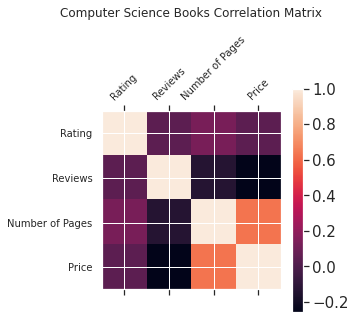

In [115]:
plt.figure(figsize=(25,10))
plt.matshow(books.corr())
plt.xticks(range(books.select_dtypes(['number']).shape[1]), books.select_dtypes(['number']).columns, fontsize=10, rotation=45)
plt.yticks(range(books.select_dtypes(['number']).shape[1]), books.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Computer Science Books Correlation Matrix\n', fontsize=12, pad=70)
plt.show()

***To summarize the data, we can look at a correlation matrix.***


*   In statistics, correlation or dependence is any statistical relationship
*   Essentially we want to review any patterns in the data
*   The value of a correlation coefficient ranges between -1 and +1





***Since Number of Pages and Price have a correlation of 0.6, let's take a look at this on a scatterplot.***

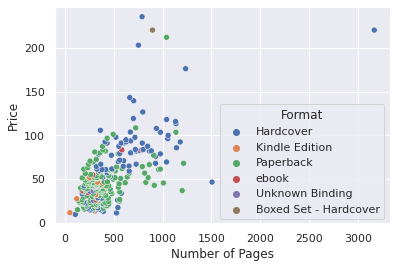

In [97]:
sns.scatterplot(data=books, x = 'Number of Pages',y = 'Price', hue = 'Format')

***So, Format is included here which could also have an effect on price.***

*   Number of Pages, Price, and Paperback is in the lower left quandrant
*   Number of Pages, Price, and Hardcover tends to be in the upper right quandrants

***We can infer there is a correalation.***



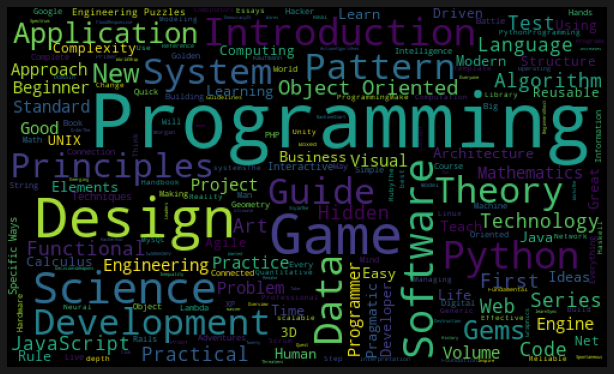

In [166]:
def get_text(column):
    words = ''
    for text in column:
        words += text
    return words

text1 = get_text(books['Book Title'])

#stopwords = set(STOPWORDS)
stopwords = ["Computer"] + list(STOPWORDS)
wc = WordCloud(background_color= 'black', stopwords= stopwords,
              width=500, height=300)

wc.generate(text1)
plt.figure(figsize=(10,5), facecolor='k')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wc)
plt.show()

**As we can see the most frequent text, excluding Computer, in Title is:**


*   Programming
*   Design
*   Game




***Let's create now just filter for Python Specific books.***

In [157]:
py_data = books[books['Book Title'].str.contains('Python')]
py_data['Book Title']

44     Python Programming Books Set: Python Programmi...
56     Python Crash Course: A Hands-On, Project-Based...
57     Invent Your Own Computer Games with Python, 3r...
64     Python Programming For Beginners: Quick And Ea...
75     Automate the Boring Stuff with Python: Practic...
85     How to Think Like a Computer Scientist: Learni...
95                             Learn Python The Hard Way
96     Effective Python: 59 Specific Ways to Write Be...
120                    Making Games with Python & Pygame
135                             Python for Data Analysis
136    Data Science from Scratch: First Principles wi...
144    Introduction to Computation and Programming Us...
194    Fluent Python: Clear, Concise, and Effective P...
203                                      Learning Python
Name: Book Title, dtype: object

***Let's have a look at if and how the wordcloud has changed.***

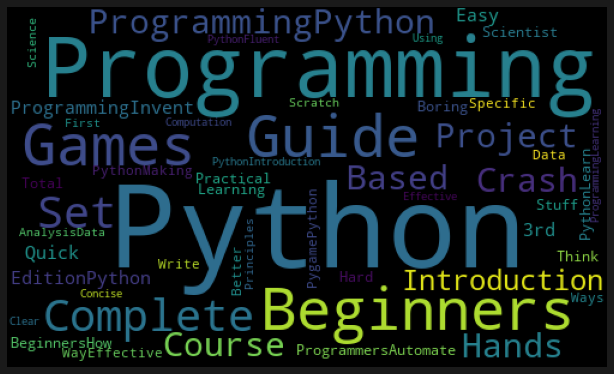

In [167]:
text2 = get_text(py_data['Book Title'])

#stopwords = set(STOPWORDS)
stopwords = ["Books", "Computer"] + list(STOPWORDS)
wc = WordCloud(background_color= 'black', stopwords= stopwords,
              width=500, height=300)

wc.generate(text2)
plt.figure(figsize=(10,5), facecolor='k')
plt.axis('off')
plt.tight_layout(pad=0)
plt.imshow(wc)
plt.show()

**As we can see the most frequent text, excluding Books & Computer, is:**

*   Python
*   Programming
*   Beginners


In [170]:
py_data.sort_values(by=['Reviews','Rating'], ascending=False).head(3)

,Rating,Reviews,Book Title,Description,Number of Pages,Format,Price
75,4.27,153,Automate the Boring Stuff with Python: Practic...,If you've ever spent hours renaming files or u...,479,Paperback,33.058824
203,3.96,150,Learning Python,"Portable, powerful, and a breeze to use, Pytho...",1214,Paperback,67.873529
56,4.35,126,"Python Crash Course: A Hands-On, Project-Based...","Python Crash Course is a fast-paced, thorough ...",560,Paperback,26.344118


In [176]:
html_code = \
'''
<center><head><b>Highest Rated Python Books<b></head>
<br><img src='https://animeuniverses.com/wp-content/uploads/2020/11/51SYS7OOBkL._SX376_BO1204203200_.jpg'
 width="160" height="250"></img>
<img src='https://images.secondsale.com/images/c2af7b7c01a1b04e38c4c52e167e47bf.jpg'
 width="160" height="250"></img>
<img src='https://pdfshelfs1.s3-accelerate.amazonaws.com/2021/02/python-crash-course-2nd-edition-1.jpg'
 width="160" height="250"></img>
></center> 
'''
display(IPython.display.HTML(html_code))

# Conclusion

Conclusion(s) / key takeaways


*   Format is mostly offered in paperback
*   Ratings are mainly 4, but lowest rated is 3, this dataset only the most popular CS books after all so the lowest rating being neutral makes sense.
*   Prices fall between 20 and 50 dollars
*   If you wanted to spend on 10 of the highest rated, you’ll spend 600+ dollars whereas most reviewed is ~200 dollars
*   Most reviewed and highest rated, Hardcover, Paperback, and Kindle are the available formats and equate to 3000+ pages
*   Correlations in this dataset, Price : Number of Pages followed by Ratings : Reviews
*   Whether we are looking at the full dataset for title or just where python is included, the most frequently used word is Programming.
*   When we are looking at only where title contains Python Beginners is commonly used.


Thank you for viewing my project! I am only a beginner so any feedback is welcome.